In [56]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils
import skimage.exposure



In [57]:
import cv2
image = cv2.imread("/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/Miche_Dataset/train_img/002_GS4_OU_F_LI_01_2.jpg")
mask_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/Miche_Dataset/train_masks/002_GS4_OU_F_LI_01_2.bmp"
hh, ww = image.shape[:2]
ori_image = image.copy()
raw_image = cv2.imread(mask_path)
image = cv2.resize(image,(300,300))
raw_image = cv2.resize(raw_image,(300,300))

In [58]:
print(image.shape)
print(raw_image.shape)

(300, 300, 3)
(300, 300, 3)


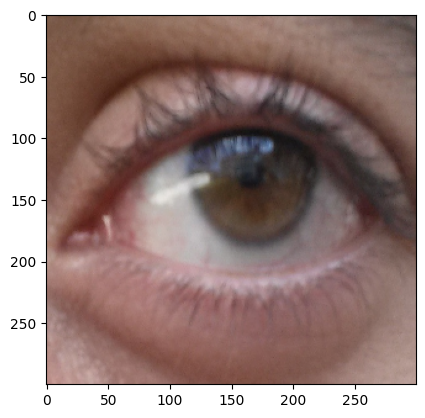

In [59]:
plt.imshow(image[:,:,::-1])

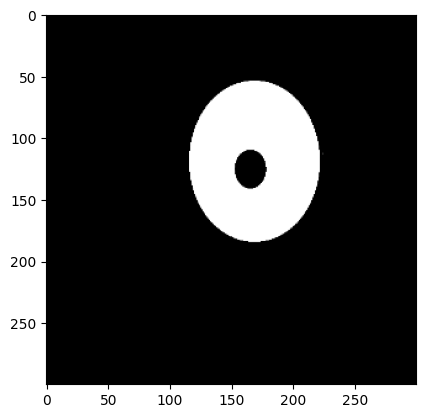

In [60]:
plt.imshow(raw_image)

In [61]:
print(np.unique(raw_image))

[  0   1   3   4   5   6   7   8  10  11  12  13  14  16  17  18  19  20
  21  22  24  25  27  28  29  30  31  34  35  37  39  40  41  42  43  44
  45  46  47  49  50  51  53  54  56  58  59  61  63  64  65  66  69  70
  73  74  75  76  77  79  83  86  88  89  91  93  94  97  98  99 100 101
 103 105 106 108 109 112 115 118 119 120 127 128 130 132 133 134 135 140
 141 144 145 157 158 160 161 164 168 170 171 174 179 180 182 183 186 187
 190 191 195 197 199 200 201 202 203 210 212 213 214 215 216 217 218 219
 220 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 246 247 248 249 252 253 254 255]


In [62]:
gray = cv2.cvtColor(raw_image,cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray, 5)
# blur = cv2.GaussianBlur(gray, (5, 5), 0)


# print(np.min(blur))
# print(np.max(blur))

In [63]:
thresh2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

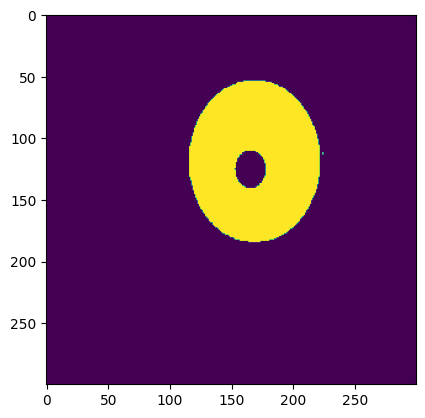

In [64]:
plt.imshow(thresh2)

In [65]:
edge_detected_image = cv2.Canny(gray, 0, 200)

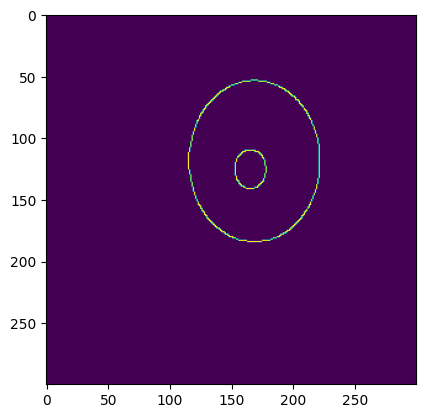

In [66]:
plt.imshow(edge_detected_image)

In [67]:
# plt.imshow(blur)

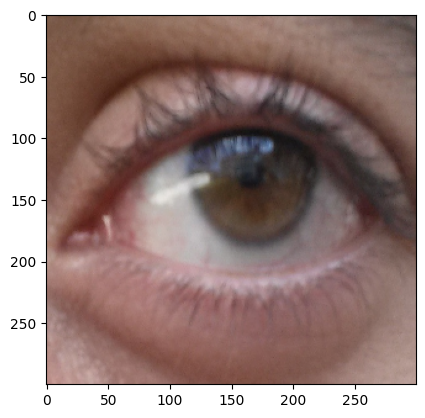

In [68]:
plt.imshow(image[:,:,::-1])

In [69]:
cnts,_ = cv2.findContours(median,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

bg_mask = np.zeros_like(raw_image)



In [70]:
for contour in cnts:
    # approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    print(area)
    # if area > 100:
    # 
    if area< 10000:
        cv2.drawContours(bg_mask,[contour],0,(0,255,0),-1)
    else:
        cv2.drawContours(bg_mask,[contour],0,(0,0,255),-1)


10872.0
620.5


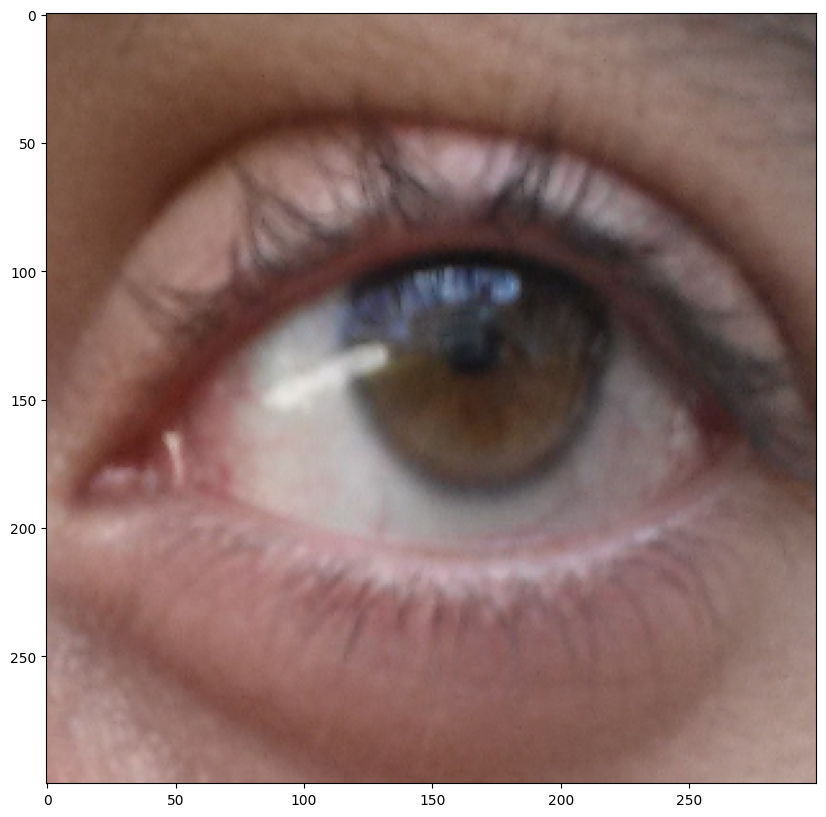

In [71]:
plt.figure(figsize = (20,10))
plt.imshow(image[:,:,::-1])
# plt.imshow(raw_image,alpha=0.4)

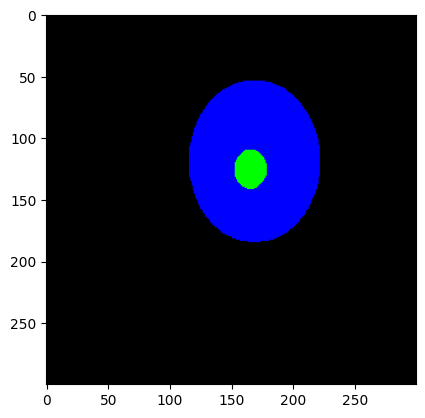

In [72]:
plt.imshow(bg_mask)

In [73]:
print(np.unique(bg_mask))
print(np.count_nonzero((bg_mask == [0, 0, 0]).all(axis = 2)))

[  0 255]
78958


In [74]:
color_map = [[0,0,0],[0,255,0],[0,0,255]]


In [75]:

output_mask = []
for i,color in enumerate(color_map):
    cmap = np.all(np.equal(bg_mask,color),axis=-1)
    output_mask.append(cmap)
output_mask = np.stack(output_mask,axis=-1)

grayscale_mask = np.argmax(output_mask, axis=-1)
grayscale_mask = (grayscale_mask / len(color_map)) * 255
grayscale_mask = np.expand_dims(grayscale_mask, axis=-1)


    

In [76]:
print(np.unique(grayscale_mask))

[  0.  85. 170.]


In [77]:
cv2.imwrite("grayscale.png",grayscale_mask)

True

In [37]:
def process_mask(rgb_mask, colormap):
    output_mask = []

    for i, color in enumerate(colormap):
        cmap = np.all(np.equal(rgb_mask, color), axis=-1)
        output_mask.append(cmap)
        
    print(len(output_mask))

    output_mask = np.stack(output_mask, axis=-1)
    return output_mask

In [38]:
processed_mask = process_mask(bg_mask,color_map)

3


In [39]:
grayscale_mask = np.argmax(processed_mask, axis=-1)
grayscale_mask = (grayscale_mask / len(color_map)) * 255
grayscale_mask = np.expand_dims(grayscale_mask, axis=-1)

In [40]:
grayscale_mask.shape

(300, 300, 1)

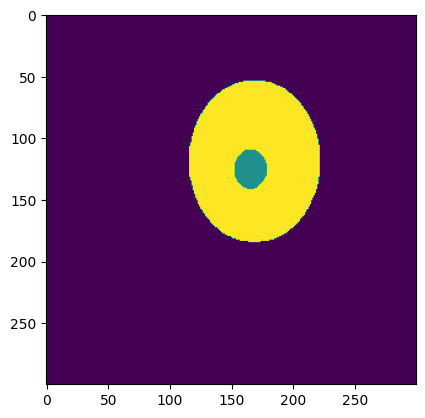

In [41]:
plt.imshow(grayscale_mask)

In [42]:
img = cv2.imread("/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/MICHE_MULTICLASS/train_mask/001_GS4_IN_F_RI_01_1.png")

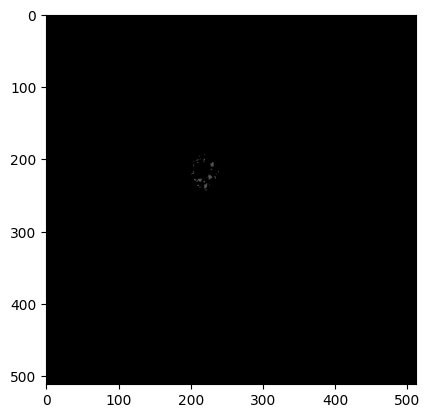

In [44]:
plt.imshow()

In [78]:
# Pytorch Multiclas

In [130]:
from glob import glob
train_images = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/MICHE_MULTICLASS/Dataset/train_img"
train_masks  = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/MICHE_MULTICLASS/Dataset/train_masks"


val_images = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/MICHE_MULTICLASS/Dataset/val_img"

val_masks =  "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/MICHE_MULTICLASS/Dataset/val_masks" 


train_x = sorted(
        glob(f"{train_images}/*"))
train_y = sorted(
        glob(f"{train_masks}/*"))
valid_x = sorted(
        glob(f"{val_images}/*"))
valid_y = sorted(
        glob(f"{val_masks }/*"))

In [131]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import os
import cv2
import torch
from torch.utils.data.dataset import Dataset
import albumentations as A
import segmentation_models_pytorch as smp



In [141]:
class IRIS(Dataset):
    def __init__(self,image_path,mask_path,transform=None):
        self.image_path = image_path
        self.mask_path = mask_path
        self.transform = transform
    def __getitem__(self,idx):
        image = cv2.imread(self.image_path[idx])
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.mask_path[idx],cv2.IMREAD_UNCHANGED)
        image = image.astype("uint8")
        mask = mask.astype("uint8")
        mask = np.expand_dims(mask,axis=2)
        
        if (self.transform is not None):
            transformed = self.transform(image=image,mask = mask)
            image = transformed["image"]
            mask = transformed["mask"]
            image = torch.from_numpy(image)
            mask = torch.from_numpy(mask)
            image = image.permute(2,0,1)
            image = image.float()/255
            mask = mask.permute(2,0,1)
            mask = mask.float()/255
            
        else:
            image = torch.from_numpy(image)
            mask = torch.from_numpy(mask)
            image = image.permute(2, 0, 1)
            image = image.float()/255
            mask = mask.permute(2, 0, 1)
            mask = mask.float()/255
            
        return image,mask
        
    def __len__(self):
        return len(self.image_path)
        

In [142]:
x = IRIS(train_x,train_y)


In [143]:
x.__getitem__(1)

(tensor([[[0.8824, 0.8706, 0.8627,  ..., 0.3059, 0.2980, 0.3020],
          [0.8549, 0.8667, 0.8784,  ..., 0.3137, 0.3059, 0.3098],
          [0.8745, 0.8745, 0.8784,  ..., 0.3137, 0.3020, 0.3059],
          ...,
          [0.7294, 0.7255, 0.7216,  ..., 0.9020, 0.8941, 0.8941],
          [0.7216, 0.7176, 0.7059,  ..., 0.9098, 0.9020, 0.9020],
          [0.7098, 0.7176, 0.6980,  ..., 0.9059, 0.9059, 0.9059]],
 
         [[0.8824, 0.8706, 0.8627,  ..., 0.2471, 0.2392, 0.2431],
          [0.8549, 0.8667, 0.8784,  ..., 0.2549, 0.2471, 0.2510],
          [0.8745, 0.8745, 0.8784,  ..., 0.2667, 0.2431, 0.2471],
          ...,
          [0.6706, 0.6667, 0.6627,  ..., 0.8745, 0.8627, 0.8627],
          [0.6627, 0.6588, 0.6471,  ..., 0.8824, 0.8706, 0.8706],
          [0.6549, 0.6627, 0.6431,  ..., 0.8863, 0.8863, 0.8863]],
 
         [[0.8745, 0.8627, 0.8549,  ..., 0.2667, 0.2510, 0.2549],
          [0.8471, 0.8588, 0.8706,  ..., 0.2745, 0.2588, 0.2627],
          [0.8667, 0.8667, 0.8706,  ...,

In [144]:
test_transform = A.Compose(
    [A.Resize(512, 512),]
)

train_transform = A.Compose(
    [
        A.Resize(512, 512),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
        A.MedianBlur(blur_limit=3, always_apply=False, p=0.1),
    ]
)

In [145]:
trainDS = IRIS(train_x,train_y,transform=train_transform)
testDS = IRIS(valid_x,valid_y,transform=test_transform)

In [146]:
trainDL = torch.utils.data.DataLoader(trainDS, batch_size=1, shuffle=True,drop_last=True)
testDL =  torch.utils.data.DataLoader(testDS, batch_size=1, shuffle=False,drop_last=True)

In [147]:
batch = next(iter(trainDL))
images, labels = batch
print(images.shape, labels.shape, type(images), type(labels), images.dtype, labels.dtype)

torch.Size([1, 3, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'> <class 'torch.Tensor'> torch.float32 torch.float32


In [164]:
MULTICLASS_MODE: str = "multiclass"
ENCODER = "resnet18"
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['background', 'building', 'woodlands', 'water']
ACTIVATION = None
device = 'cuda'

In [151]:
model = smp.Unet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=3, 
    activation=None,
)

In [173]:
Diceloss = smp.losses.DiceLoss(mode="multiclass")
loss.__name__ = 'Dice_loss'
#Will not monitor any metircs other than loss. 
metrics=[]

In [160]:
len(trainDL)

1310

In [161]:
import torch.optim as optim
max_lr = 1e-3
epoch = 10
weight_decay = 1e-6


optimizer = torch.optim.Adam(model.parameters(), lr=max_lr, weight_decay=weight_decay)
sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epoch,
                                            steps_per_epoch=len(trainDL))

In [174]:
def fit(epochs, model, train_loader, val_loader, optimizer, scheduler, patch=False):
    train_losses = []
    test_losses = []
    val_iou = []; val_acc = []
    train_iou = []; train_acc = []
    lrs = []
    min_loss = np.inf
    decrease = 1 ; not_improve=0

    model.to(device)
    
    for e in range(epochs):
        
        running_loss = 0
        iou_score = 0
        accuracy = 0
        #training loop
        model.train()
        for i, data in enumerate(train_loader):
            #training phase
            image_tiles, mask_tiles = data
            if patch:
                bs, n_tiles, c, h, w = image_tiles.size()

                image_tiles = image_tiles.view(-1,c, h, w)
                mask_tiles = mask_tiles.view(-1, h, w)
            
            image = image_tiles.to(device); mask = mask_tiles.to(device);
            #forward
            output = model(image)
            loss = Diceloss(mask, output)
            
            
            #backward
            loss.backward()
            optimizer.step() #update weight          
            optimizer.zero_grad() #reset gradient
            
            #step the learning rate
            lrs.append(get_lr(optimizer))
            scheduler.step() 
            
            running_loss += loss.item()
            
        else:
            model.eval()
            test_loss = 0
            test_accuracy = 0
            val_iou_score = 0
            #validation loop
            with torch.no_grad():
                for i, data in enumerate(tqdm(val_loader)):
                    #reshape to 9 patches from single image, delete batch size
                    image_tiles, mask_tiles = data

                    if patch:
                        bs, n_tiles, c, h, w = image_tiles.size()

                        image_tiles = image_tiles.view(-1,c, h, w)
                        mask_tiles = mask_tiles.view(-1, h, w)
                    
                    image = image_tiles.to(device); mask = mask_tiles.to(device);
                    output = model(image)
                    #evaluation metrics
                    
                    #loss
                    loss = Diceloss(mask, output)                                  
                    test_loss += loss.item()
            
            #calculatio mean for each batch
            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(val_loader))


            if min_loss > (test_loss/len(val_loader)):
                print('Loss Decreasing.. {:.3f} >> {:.3f} '.format(min_loss, (test_loss/len(val_loader))))
                min_loss = (test_loss/len(val_loader))
                decrease += 1
                if decrease % 5 == 0:
                    print('saving model...')
                    model_name = "{}_model_{}val_iou{:.3f}.pt".format("Miche",get_current_date_time(),val_iou_score/len(val_loader))
                    
                    torch.save(model,model_name)
                    

           
            val_iou.append(val_iou_score/len(val_loader))
            train_iou.append(iou_score/len(train_loader))
            train_acc.append(accuracy/len(train_loader))
            val_acc.append(test_accuracy/ len(val_loader))
            print("Epoch:{}/{}..".format(e+1, epochs),
                  "Train Loss: {:.3f}..".format(running_loss/len(train_loader)),
                  "Val Loss: {:.3f}..".format(test_loss/len(val_loader)),
                  "Train IoU:{:.3f}..".format(iou_score/len(train_loader)),
                  "Val IoU: {:.3f}..".format(val_iou_score/len(val_loader)),
                  "Train Acc:{:.3f}..".format(accuracy/len(train_loader)),
                  "Val Acc:{:.3f}..".format(test_accuracy/len(val_loader)),
                  "Time: {:.2f}m".format((time.time()-since)/60))
            
            train_metrics = {"train/epoch":e+1,"train/train_loss":running_loss/len(train_loader),"train/iou":iou_score/len(train_loader),"train/accuracy":accuracy/len(train_loader)}
    
            val_metrics = {"train/epoch":e+1,"val/val_loss":test_loss/len(val_loader),"val/iou":val_iou_score/len(val_loader),"val/accuracy":test_accuracy/len(val_loader)}

            

In [175]:
fit(epochs=10,model=model,train_loader=trainDL, val_loader=testDL, optimizer=optimizer, scheduler=sched)

RuntimeError: one_hot is only applicable to index tensor.